In [1]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Defining the probability density function

In [2]:
def pdf(X):
    values = (norm.pdf(X,0.2,0.08) + norm.pdf(X,0.6,0.1))/2
    probabilities = values/np.sum(values)
    return probabilities

#### Sampling from the PDF to create training data

In [3]:
x = np.arange(0,1,0.0001)
p=pdf(x)
samples = np.random.choice(x, size=1000, p=p)

#### Fitting three KDE models with different bandwidths on the same data

In [4]:
samples = samples.reshape(-1, 1)
kde_1 = KernelDensity(bandwidth=0.002,kernel='gaussian').fit(samples)
kde_2 = KernelDensity(bandwidth=0.02,kernel='gaussian').fit(samples)
kde_3 = KernelDensity(bandwidth=0.2,kernel='gaussian').fit(samples)

#### Plotting the predicted PDF against the actual PDF

In [5]:
X= np.arange(0,1,0.001)
y = pdf(X)
kde_1y = np.exp(kde_1.score_samples(X.reshape(-1, 1)))
kde_1y /= np.sum(kde_1y)
kde_2y = np.exp(kde_2.score_samples(X.reshape(-1, 1)))
kde_2y /= np.sum(kde_2y)
kde_3y = np.exp(kde_3.score_samples(X.reshape(-1, 1)))
kde_3y /= np.sum(kde_3y)

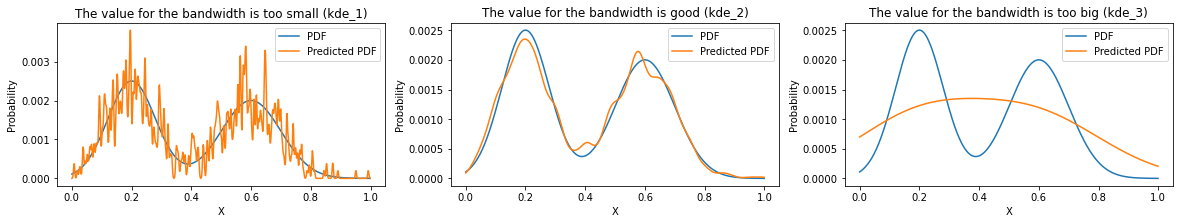

In [6]:
axs_details = [['The value for the bandwidth is too small (kde_1)', kde_1y], ['The value for the bandwidth is good (kde_2)',kde_2y],['The value for the bandwidth is too big (kde_3)', kde_3y]]
fig, axs = plt.subplots(1, 3, figsize=(20,3))
for (ax, (title, kde_y)) in zip(axs, axs_details):
    ax.set_xlabel('X')
    ax.set_ylabel('Probability')
    ax.set_title(title)
    ax.plot(X, y, label='PDF')
    ax.plot(X, kde_y, label='Predicted PDF')
    ax.legend(loc='upper right')
plt.show()